In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

In [193]:
data = pd.read_csv("abalone.data")

In [194]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [195]:
x = data.drop("Sex", axis=1)
y = data["Sex"]

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [197]:
grid_params = {
  'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan']
}

gs = GridSearchCV(
  KNeighborsClassifier(),
  grid_params,
  verbose=3,
  cv = 3,
  n_jobs=-1
)

knn = gs.fit(x_train, y_train)

Fitting 3 folds for each of 44 candidates, totalling 132 fits


In [198]:
predict = knn.predict(x_test)

In [199]:
print(knn.score(x_test, y_test))

0.5473684210526316


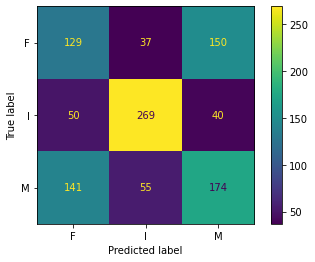

In [200]:
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

In [201]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           F       0.40      0.41      0.41       316
           I       0.75      0.75      0.75       359
           M       0.48      0.47      0.47       370

    accuracy                           0.55      1045
   macro avg       0.54      0.54      0.54      1045
weighted avg       0.55      0.55      0.55      1045



<AxesSubplot:>

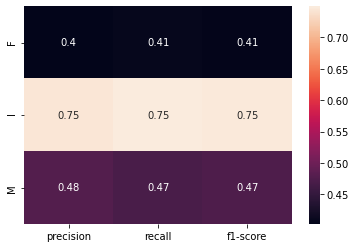

In [202]:
clf_report = classification_report(y_test, predict, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1,:-3].T, annot=True)

In [203]:
print(knn.best_score_)
print(knn.best_params_)

0.5363984674329502
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
